In [641]:
import random
import json
import matplotlib
import Crypto
from Crypto.PublicKey import RSA
from Crypto import Random
from Crypto.Cipher import PKCS1_OAEP, DES
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
def generate_plaintext(length):
    alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    arr = []
    for i in range(length):
        arr.append(random.choice(alphabet))
    return ''.join(arr)

In [52]:
generate_plaintext(32)

'uYXjhFWblxmr4RRWWxcrr9BpeuZLPiRM'

In [53]:
with open('words_dictionary.json') as file:
    dictionary = list(json.load(file).keys())

In [54]:
def generate_plaintext_words(length):
    arr = []
    for i in range(length):
        arr.append(random.choice(dictionary))
    return ' '.join(arr)

In [55]:
generate_plaintext_words(20)

'homogene physeteroid commercialized readapted megalichthyidae theologise mistraces supply alapa animis pratensian scotomas volcanologize syllab hypoalbuminemia clinandrdria holoptychiid unstructurally tenementary unfinishedness'

In [56]:
def create_datasets(count):
    dataset_random = []
    dataset_words = []
    for i in range(count):
        dataset_random.append(generate_plaintext(128))
        dataset_words.append(generate_plaintext_words(40)[:128])
    return dataset_random[:int(count*0.9)], dataset_random[int(count*0.9):], dataset_words[:int(count*0.9)], dataset_words[int(count*0.9):]

In [57]:
train_random, test_random, train_words, test_words = create_datasets(1000)

In [58]:
def enc_rsa(plain):
    key = RSA.generate(2048)
    # print(plain)
    rsa_private = PKCS1_OAEP.new(key)
    encrypted = rsa_private.encrypt(str.encode(plain))
    # print(encrypted)
    # rsa_public = PKCS1_OAEP.new(key)
    # decrypted = rsa_public.decrypt(encrypted)
    # print(decrypted)
    return encrypted

In [59]:
enc_rsa(train_words[0])

b'v\x1cI\xa0@\xba?\x0fv\xb7e\x19z\x1b\xfb\xe7\x13&\x05\xfd\xbe\xda\x92\xa5\x98YQ;m\x1b\xa2\x17\x11\xc7\xd0\xb2B]\x15 \x17\xcc\xfb\xb1\x8b\xbb\xb3U\x8a\xa7&\x08\xc2Q\xf0\xb0\x8fO\rt^\xb8\xc6>\x17\xc4\xa5Y\x8d\xc4P\xb7G\xc2\xc0\xd4\xc2`\xed3\x81\x8a\xd26+\xcdv\xff\xd2Z\x05\xd2U6\xb9\xa1\xa5,\x07\xc6<j\x95\xa1z\xef\x7f\x16$\xbb\x8b\x0e\xd8>\x89zc\x98\x19I%u\xe3\xfcW\xd9<Jj\x15\x1f\x8b\xe9\xee\x04v\xaf\x8d\xc6O\xcbBr\x88Q2?L(\xd5\xf6\xae\x86\xa85L\xa9\xa1\xf4\x10\x18p-\xb5\x83\x16\xa3\x98jsE\xac\x05/T\x93\xa7\xc2\x057\xed\xb9\x05\x97\x19XL\xd5}\x1d\xd3K\xa890\x03\x95\xfb$!\xf4\x8e\xb5\x196\xe5+\x19\xa5\x05_\xc3M\xe7\x84\xec\x01C{\x1bA\x04\x93Y\xe0\xc5(\x04\xf3\xf5\xd2X\xed\x10"\xbdM\xd3g\x97L5u$\x9d\xf6\xbe\xed\xfe\xf9\xb4F\x19~R\xa6'

In [69]:
def enc_des(plain):
    key = '5sarmale'.encode()
    des = DES.new(key, DES.MODE_ECB)
    encrypted = des.encrypt(str.encode(plain))
    # decrypted = des.decrypt(encrypted)
    # print(decrypted)
    return encrypted

In [70]:
enc_des(train_words[0])

b'c\xf3h\xc5\xeb\xce\xa0q\xce\x04\xb4\xbd4Uom\xa9\x93\x1b\xf3@z>\xe8N\xa2F\xfd\x88\x8f\xb2\x0c\xb0\x8a\x7f\xde1e\x84\x01\x80/\xfa\xb8Ak\x07\x0es\xf3\xd6Dh\xa9\x05\'q\xcf\xccmr\xf8\xfbx\xd1\x82\x1d`\r\xb1\x04N\xfd\x18eO\xcc\tG\x86\xabb\xb9\xdbF\x0c/+_\xa0\xf8uj\xf5\xc8"%\x03\xa4\xb3)i\xa7\xbcb\xa7\x1byE\x05\\\xb9\xa0\xe4\x80\x99T\xf1\x8dv\xac}\xc2\xb6\xc6\x1b\x83\x04'

In [72]:
# train_random_des = [enc_des(x) for x in train_random]
# test_random_des = [enc_des(x) for x in test_random]
# train_words_des = [enc_des(x) for x in train_words]
# test_words_des = [enc_des(x) for x in test_words]

In [73]:
# train_random_rsa = [enc_rsa(x) for x in train_random]
# test_random_rsa = [enc_rsa(x) for x in test_random]
# train_words_rsa = [enc_rsa(x) for x in train_words]
# test_words_rsa = [enc_rsa(x) for x in test_words]

In [81]:
# from base64 import b64encode, b64decode
# save_plain = [train_random, test_random, train_words, test_words]

# save_train_random_des = [b64encode(x).decode() for x in train_random_des]
# save_test_random_des = [b64encode(x).decode() for x in test_random_des]
# save_train_words_des = [b64encode(x).decode() for x in train_words_des]
# save_test_words_des = [b64encode(x).decode() for x in test_words_des]

# save_train_random_rsa = [b64encode(x).decode() for x in train_random_rsa]
# save_test_random_rsa = [b64encode(x).decode() for x in test_random_rsa]
# save_train_words_rsa = [b64encode(x).decode() for x in train_words_rsa]
# save_test_words_rsa = [b64encode(x).decode() for x in test_words_rsa]

# save_des = [save_train_random_des, save_test_random_des, save_train_words_des, save_test_words_des]
# save_rsa = [save_train_random_rsa, save_test_random_rsa, save_train_words_rsa, save_test_words_rsa]
# save = [save_plain, save_des, save_rsa]
# with open("save.json", "w") as file:
#     json.dump(save, file, indent=4)

In [86]:
from base64 import b64encode, b64decode

with open("save.json") as file:
    data = json.load(file)
    
[save_plain, save_des, save_rsa] = data
[train_random, test_random, train_words, test_words] = save_plain
[save_train_random_des, save_test_random_des, save_train_words_des, save_test_words_des] = save_des
[save_train_random_rsa, save_test_random_rsa, save_train_words_rsa, save_test_words_rsa] = save_rsa

train_random_des = [b64decode(x) for x in save_train_random_des]
test_random_des = [b64decode(x) for x in save_test_random_des]
train_words_des = [b64decode(x) for x in save_train_words_des]
test_words_des = [b64decode(x) for x in save_test_words_des]

train_random_rsa = [b64decode(x) for x in save_train_random_rsa]
test_random_rsa = [b64decode(x) for x in save_test_random_rsa]
train_words_rsa = [b64decode(x) for x in save_train_words_rsa]
test_words_rsa = [b64decode(x) for x in save_test_words_rsa]

print(train_words_des[0])

b'c\xf3h\xc5\xeb\xce\xa0q\xce\x04\xb4\xbd4Uom\xa9\x93\x1b\xf3@z>\xe8N\xa2F\xfd\x88\x8f\xb2\x0c\xb0\x8a\x7f\xde1e\x84\x01\x80/\xfa\xb8Ak\x07\x0es\xf3\xd6Dh\xa9\x05\'q\xcf\xccmr\xf8\xfbx\xd1\x82\x1d`\r\xb1\x04N\xfd\x18eO\xcc\tG\x86\xabb\xb9\xdbF\x0c/+_\xa0\xf8uj\xf5\xc8"%\x03\xa4\xb3)i\xa7\xbcb\xa7\x1byE\x05\\\xb9\xa0\xe4\x80\x99T\xf1\x8dv\xac}\xc2\xb6\xc6\x1b\x83\x04'


In [626]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(128, 16),
            nn.ReLU(),
            # nn.Linear(32, 16),
            # nn.ReLU(),
            nn.Linear(16, 2),
            nn.ReLU(),
            # nn.Softmax()
        )

    def forward(self, x):
        x = torch.flatten(x, 1)
        logits = self.linear_relu_stack(x)
        return logits

In [627]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=128, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=2, bias=True)
    (3): ReLU()
  )
)


In [628]:
# input_value = torch.frombuffer(train_random_des[1], dtype=torch.float)
# model(input_value)

In [629]:
class CustomDataset(Dataset):
    def __init__(self, use_random, use_words, transform=None):
        self.transform = transform
        trainset = []
        
        if use_random:
            for x in train_random_rsa:
                trainset.append({
                    'data': x[:128],
                    'label': 0,
                })
            for x in train_random_des:
                trainset.append({
                    'data': x,
                    'label': 1,
                })
        
        if use_words:
            for x in train_words_rsa:
                trainset.append({
                    'data': x[:128],
                    'label': 0,
                })
            for x in train_words_des:
                trainset.append({
                    'data': x,
                    'label': 1,
                })
        
        random.shuffle(trainset)
        self.trainset = trainset

    def __len__(self):
        return len(self.trainset)

    def __getitem__(self, idx):
        item = self.trainset[idx]
        
        if self.transform:
            item = self.transform(item)
            
        item_tensor = torch.frombuffer(item['data'], dtype=torch.uint8)/255
        label_tensor = torch.FloatTensor(item['label'])

        return torch.nan_to_num(item_tensor), item['label'] 

In [630]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [631]:
dataset = CustomDataset(False, True)
dataset.__len__()

1800

In [632]:
trainloader = torch.utils.data.DataLoader(dataset, batch_size=8, num_workers=0)

In [633]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# print(list(model.parameters()))

In [639]:
def measure(use_random, use_words):
    testset = []

    if use_random:
        for x in test_random_rsa:
            testset.append({
                'data': x[:128],
                'label': 0,
            })
        for x in test_random_des:
            testset.append({
                'data': x,
                'label': 1,
            })

    if use_words:
        for x in test_words_rsa:
            testset.append({
                'data': x[:128],
                'label': 0,
            })
        for x in test_words_des:
            testset.append({
                'data': x,
                'label': 1,
            })

    random.shuffle(testset)
    
    count_correct = 0
    
    c_rr = 0
    c_rd = 0
    c_dr = 0
    c_dd = 0
    
    model.eval()
    with torch.no_grad():
        for idx in range(len(testset)):
            item = testset[idx]
            item_tensor = torch.frombuffer(item['data'], dtype=torch.uint8)/255
            label_tensor = torch.FloatTensor(item['label'])

            item_input = torch.nan_to_num(item_tensor)
            item_batch_input = torch.unsqueeze(item_input, 0)

            output = model(item_batch_input)

            # print(output)

            predicted_class = 'rsa' if output[0][0] > output[0][1] else 'des'
            true_class = 'rsa' if item['label'] == 0 else 'des'

            if predicted_class == 'rsa' and true_class == 'rsa':
                c_rr += 1
            if predicted_class == 'rsa' and true_class == 'des':
                c_rd += 1
            if predicted_class == 'des' and true_class == 'rsa':
                c_dr += 1
            if predicted_class == 'des' and true_class == 'des':
                c_dd += 1
            
            if predicted_class == true_class:
                count_correct += 1
    
    print(f'{count_correct}/{len(testset)}')
    return count_correct, len(testset), c_rr, c_rd, c_dr, c_dd

measure(True, True)

224/400


(224, 400, 111, 87, 89, 113)

In [635]:
logs_loss = []
logs_accuracy = []

for epoch in range(100):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        
        # print(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        # if i%40 == 19:
        #     print(f'[epoch {epoch + 1}, batch {(i+1)//20}] loss: {running_loss}')
        
    print(f'[{epoch + 1}] loss: {running_loss}')
    corr, total = measure(False, True)
    
    logs_loss.append(running_loss)
    logs_accuracy.append(corr/total)

print('Finished Training')

[1] loss: 156.00836408138275
100/200
[2] loss: 155.8774869441986
99/200
[3] loss: 155.8295783996582
99/200
[4] loss: 155.7978047132492
99/200
[5] loss: 155.7726845741272
99/200
[6] loss: 155.7372566461563
99/200
[7] loss: 155.68449473381042
99/200
[8] loss: 155.6458158493042
99/200
[9] loss: 155.6103680729866
99/200
[10] loss: 155.55102843046188
99/200
[11] loss: 155.47409516572952
99/200
[12] loss: 155.36287707090378
100/200
[13] loss: 155.30418264865875
100/200
[14] loss: 155.13033217191696
100/200
[15] loss: 154.99264305830002
100/200
[16] loss: 154.85376286506653
100/200
[17] loss: 154.64321595430374
100/200
[18] loss: 154.4408968091011
100/200
[19] loss: 154.26367610692978
100/200
[20] loss: 154.04408752918243
100/200
[21] loss: 153.8422770500183
100/200
[22] loss: 153.6240416765213
100/200
[23] loss: 153.36565721035004
100/200
[24] loss: 153.11784046888351
100/200
[25] loss: 152.86102718114853
100/200
[26] loss: 152.5809178352356
100/200
[27] loss: 152.29644536972046
100/200
[28]

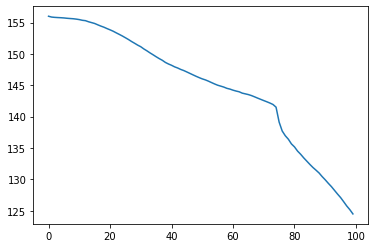

In [637]:
plt.plot(logs_loss)

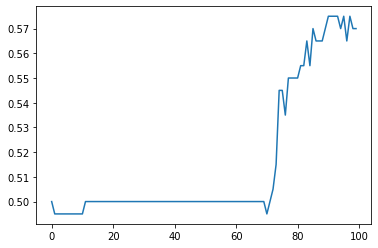

In [638]:
plt.plot(logs_accuracy)

In [640]:
corr, total, crr, crd, cdr, cdd = measure(False, True)

114/200


In [646]:
pd.DataFrame({
('Actual class', 'RSA'): {('Predicted class', 'RSA'): crr, ('Predicted class', 'DES'): cdr},
('Actual class', 'DES'): {('Predicted class', 'RSA'): crd, ('Predicted class', 'DES'): cdd},
})

Actual class    
                             RSA DES
Predicted class RSA           56  42
                DES           44  58